# Week 9 handin


In [92]:
Data = 'https://think.cs.vt.edu/corgis/datasets/csv/cars/cars.csv'
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn
import sklearn.linear_model

#### Programatically download the data from the above link.

In [5]:
from modules import webget

webget.download(Data)


# with open('cars.csv') as file_object:
#     contents = file_object.read()
    
# print(contents)


'./cars.csv'

#### Import the data into a Pandas dataframe.

In [29]:
cars_csv = Data

cars = pd.read_csv(cars_csv)
cars

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
0,140,143,202,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,True,6,6 Speed Automatic Select Shift,18,Gasoline,25,Automatic transmission,2009 Audi A3 3.2,Audi,2009 Audi A3,2009,250,236
1,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,22,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T AT,Audi,2009 Audi A3,2009,200,207
2,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Manual,21,Gasoline,30,Manual transmission,2009 Audi A3 2.0 T,Audi,2009 Audi A3,2009,200,207
3,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207
4,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5071,13,253,201,Front-wheel drive,Honda 3.5L 6 Cylinder 250 hp 253 ft-lbs,True,5,5 Speed Automatic,18,Gasoline,25,Automatic transmission,2012 Honda Pilot EX-L,Honda,2012 Honda Pilot,2012,250,253
5072,141,249,108,All-wheel drive,Lamborghini 5.2L 10 cylinder 552 hp 398 ft-lbs,True,6,6 Speed Manual,12,Gasoline,20,Manual transmission,2012 Lamborghini Gallardo Coupe LP 560-4,Lamborghini,2012 Lamborghini Gallardo Coup,2012,552,398
5073,160,249,108,All-wheel drive,Lamborghini 5.2L 10 cylinder 552 hp 398 ft-lbs,True,6,6 Speed Manual,12,Gasoline,20,Manual transmission,2012 Lamborghini Gallardo LP 560-4 Spyder,Lamborghini,2012 Lamborghini Gallardo Spyder,2012,552,398
5074,200,210,110,Rear-wheel drive,BMW 3.0L 6 cylinder 315hp 330 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,17,Gasoline,25,Automatic transmission,2012 BMW 740i Sedan,BMW,2012 BMW 7 Series,2012,315,330


#### Show the head of the Pandas dataframe.

In [30]:
cars.head()

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
0,140,143,202,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,True,6,6 Speed Automatic Select Shift,18,Gasoline,25,Automatic transmission,2009 Audi A3 3.2,Audi,2009 Audi A3,2009,250,236
1,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,22,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T AT,Audi,2009 Audi A3,2009,200,207
2,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Manual,21,Gasoline,30,Manual transmission,2009 Audi A3 2.0 T,Audi,2009 Audi A3,2009,200,207
3,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207
4,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207


#### Reduce the dataset by:
    - Make == Honda
    - Fueltype == Gasoline
    - Remove outliers. Hint: df[column name'] < df['column name'].quantile(0.90)
    - Only use 2 features: 'Fuel Information.Highway mpg' and 'Engine Information.Engine Statistics.Horsepower'
    - Normalize data (reduce values to be between 0 and 1)

In [54]:
carsH = cars[cars['Identification.Make'].isin(['Honda'])]
#carsH 
carsHG = carsH[carsH['Fuel Information.Fuel Type'].isin(['Gasoline'])]
#carsHG
carsNoOut = carsHG[carsHG['Dimensions.Height'] < carsHG['Dimensions.Height'].quantile(0.90)]
#carsNoOut
cars2Feat = carsNoOut[['Fuel Information.Highway mpg', 'Engine Information.Engine Statistics.Horsepower']]
#cars2Feat

cars_cols = cars2Feat.columns
norm_cars = preprocessing.normalize(cars2Feat)
scaled_df = pd.DataFrame(norm_cars, columns=cars_cols)
scaled_df.head()

,Fuel Information.Highway mpg,Engine Information.Engine Statistics.Horsepower
0,0.091861,0.995772
1,0.161029,0.986950
2,0.161029,0.986950
3,0.161029,0.986950
4,0.102774,0.994705


#### Perform linear regression where x = horsepower and y = mpg

In [95]:
xs = cars2Feat['Engine Information.Engine Statistics.Horsepower']
ys = cars2Feat['Fuel Information.Highway mpg']
xs_reshape = np.array(xs).reshape(-1, 1)
print(xs.shape)
print(xs_reshape.shape)
#print(xs_reshape)
model = sklearn.linear_model.LinearRegression()
model.fit(xs_reshape, ys)

(173,)
(173, 1)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### What is the coefficient (slope) of your model? What does this number mean?

In [96]:
model.coef_

array([-0.08181651])

#### According to your model, what is y when x=1.

In [99]:
#Finding b:
#b = y1 + a*x1
b = 0.091861 + (-0.08181651)*0.995772
#b

#If x=1 then y:
# y= ax+b
y = (-0.08181651)*1 + b
y



-0.07142609979572

#### Show the regression line on a scatterplot with the other datapoints.

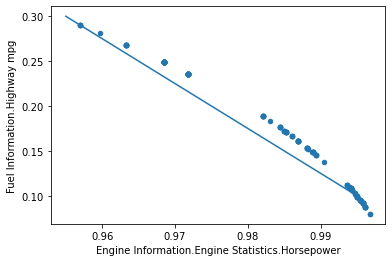

In [100]:
scaled_df.plot.scatter(x = 1, y = 0)
plt.plot([0.995, 0.955], [0.10, 0.30])